<a href="https://colab.research.google.com/github/Harshakasetty/3D-Mesh-Preprocessing/blob/main/Copy_of_Untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install trimesh numpy pandas open3d


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 736.5/736.5 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 126.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.2 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 8samples.zip to 8samples.zip


In [ ]:
import zipfile
import os

# change filename here if different
zip_path = "/content/8samples.zip"
extract_dir = "meshes"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Unzipped successfully to:", os.path.abspath(extract_dir))
os.listdir(extract_dir)


✅ Unzipped successfully to: /content/meshes


['__MACOSX', '8samples']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
def min_max_normalize(vertices):
    v_min = vertices.min(axis=0)
    v_max = vertices.max(axis=0)
    normalized = (vertices - v_min) / (v_max - v_min)
    return normalized, v_min, v_max

def min_max_denormalize(vertices_norm, v_min, v_max):
    return vertices_norm * (v_max - v_min) + v_min

def quantize(vertices_norm, n_bins=1024):
    q = np.floor(vertices_norm * (n_bins - 1)).astype(np.int32)
    return q

def dequantize(q, n_bins=1024):
    return q / (n_bins - 1)

def compute_errors(original, reconstructed):
    mse = mean_squared_error(original, reconstructed)
    mae = mean_absolute_error(original, reconstructed)
    return mse, mae

In [ ]:
mesh_folder = extract_dir
results = []

for file in os.listdir(mesh_folder):
    if file.endswith('.obj'):
        mesh_path = os.path.join(mesh_folder, file)
        mesh = trimesh.load(mesh_path, process=False)
        vertices = mesh.vertices

        # --- Normalization ---
        v_norm, v_min, v_max = min_max_normalize(vertices)

        # --- Quantization + Dequantization ---
        q = quantize(v_norm, n_bins=1024)
        v_deq = dequantize(q, n_bins=1024)

        # --- Denormalization ---
        v_recon = min_max_denormalize(v_deq, v_min, v_max)

        # --- Error metrics ---
        mse, mae = compute_errors(vertices, v_recon)
        results.append((file, mse, mae))

        print(f"🧾 {file}: MSE={mse:.6f}, MAE={mae:.6f}")


Found 8 OBJ files:  ['person.obj', 'talwar.obj', 'table.obj', 'explosive.obj', 'cylinder.obj', 'branch.obj', 'fence.obj', 'girl.obj']
Showing Original Mesh (Matplotlib)...


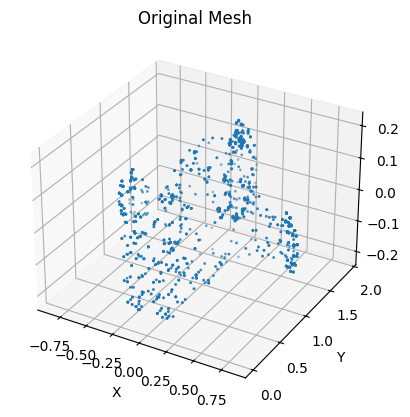

Showing Normalized Mesh (Matplotlib)...


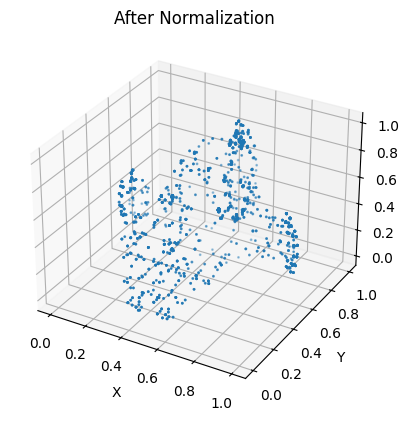

In [ ]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
import os

mesh_folder = "/content/meshes/8samples"

def min_max_normalize(vertices):
    v_min = vertices.min(axis=0)
    v_max = vertices.max(axis=0)
    normalized = (vertices - v_min) / (v_max - v_min)
    return normalized, v_min, v_max

def show_pointcloud(vertices, title="Mesh"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], s=1)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

files = [f for f in os.listdir(mesh_folder) if f.endswith(".obj")]
print(f"Found {len(files)} OBJ files: ", files)

first_mesh = os.path.join(mesh_folder, files[0])
mesh = trimesh.load(first_mesh, process=False)
v_norm, _, _ = min_max_normalize(mesh.vertices)

print("Showing Original Mesh (Matplotlib)...")
show_pointcloud(mesh.vertices, title="Original Mesh")

print("Showing Normalized Mesh (Matplotlib)...")
show_pointcloud(v_norm, title="After Normalization")


📂 Found 8 mesh files: ['person.obj', 'talwar.obj', 'table.obj', 'explosive.obj', 'cylinder.obj', 'branch.obj', 'fence.obj', 'girl.obj']

🔹 Mesh File: person.obj
   Number of Vertices: 3106
   Min (x,y,z): [-0.84375  -0.       -0.212891]
   Max (x,y,z): [0.841797 1.900391 0.210938]
   Mean (x,y,z): [ 0.00500294  1.15924209 -0.0035994 ]
   Std Dev (x,y,z): [0.39524613 0.51169099 0.09510718]
------------------------------------------------------------


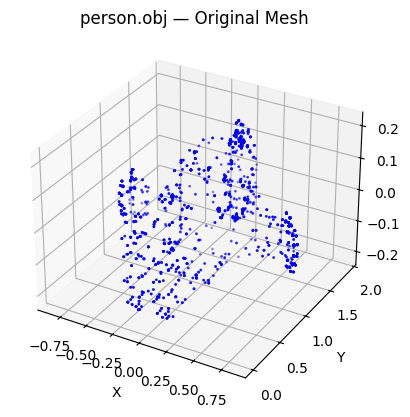

🔹 Mesh File: talwar.obj
   Number of Vertices: 1681
   Min (x,y,z): [-0.031922  0.       -0.117146]
   Max (x,y,z): [0.031922 1.       0.117146]
   Mean (x,y,z): [ 0.02171071  0.30250146 -0.00435357]
   Std Dev (x,y,z): [0.0111328  0.23643367 0.04661563]
------------------------------------------------------------


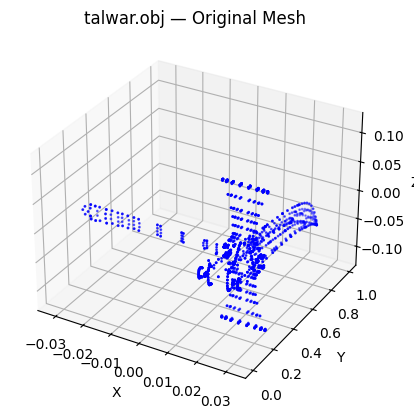

🔹 Mesh File: table.obj
   Number of Vertices: 3148
   Min (x,y,z): [-0.208906  0.       -0.5     ]
   Max (x,y,z): [0.208906 0.611761 0.5     ]
   Mean (x,y,z): [-0.01319047  0.38637404 -0.0035868 ]
   Std Dev (x,y,z): [0.1531193  0.19192155 0.34605152]
------------------------------------------------------------


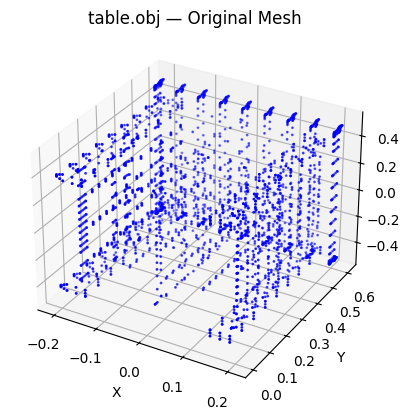

🔹 Mesh File: explosive.obj
   Number of Vertices: 2844
   Min (x,y,z): [-0.199625 -0.       -0.197126]
   Max (x,y,z): [0.199625 1.       0.197126]
   Mean (x,y,z): [ 0.04325588  0.53038879 -0.00459298]
   Std Dev (x,y,z): [0.1149912  0.38978149 0.09490338]
------------------------------------------------------------


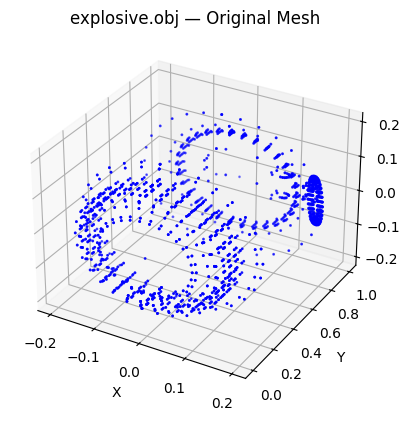

🔹 Mesh File: cylinder.obj
   Number of Vertices: 192
   Min (x,y,z): [-1. -1. -1.]
   Max (x,y,z): [1. 1. 1.]
   Mean (x,y,z): [-2.60208521e-18  0.00000000e+00  2.77555756e-17]
   Std Dev (x,y,z): [0.70710683 1.         0.70710683]
------------------------------------------------------------


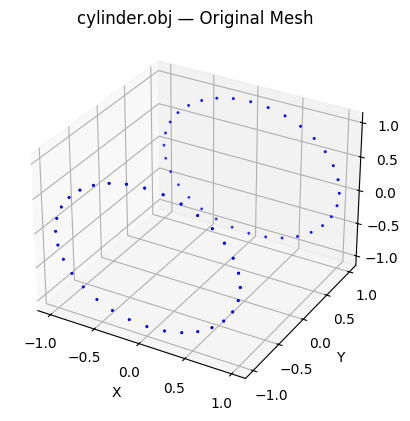

🔹 Mesh File: branch.obj
   Number of Vertices: 2767
   Min (x,y,z): [-0.851562  0.       -0.464844]
   Max (x,y,z): [0.849609 1.900391 0.462891]
   Mean (x,y,z): [0.0754427  1.0873903  0.12196689]
   Std Dev (x,y,z): [0.3433802  0.45699113 0.20006684]
------------------------------------------------------------


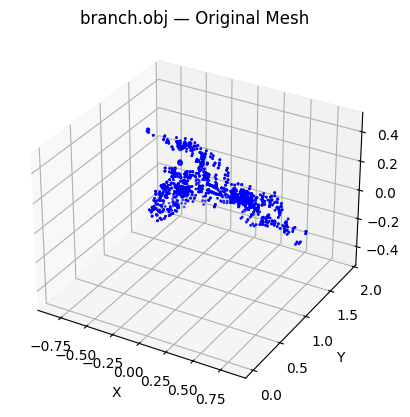

🔹 Mesh File: fence.obj
   Number of Vertices: 1090
   Min (x,y,z): [-0.5     0.     -0.0225]
   Max (x,y,z): [0.5     0.84317 0.0225 ]
   Mean (x,y,z): [-0.00398737  0.41086733 -0.00045413]
   Std Dev (x,y,z): [0.34566442 0.25397747 0.01097485]
------------------------------------------------------------


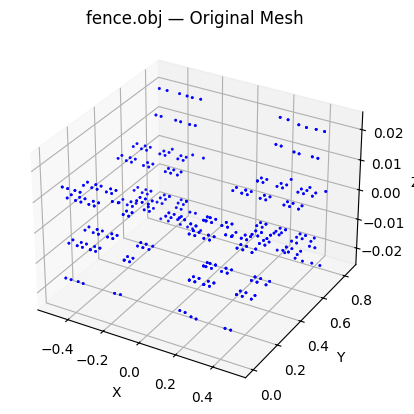

🔹 Mesh File: girl.obj
   Number of Vertices: 8400
   Min (x,y,z): [-0.5       0.       -0.181411]
   Max (x,y,z): [0.5      0.904419 0.181411]
   Mean (x,y,z): [0.00198203 0.40218391 0.01412802]
   Std Dev (x,y,z): [0.17843738 0.21453545 0.0617502 ]
------------------------------------------------------------


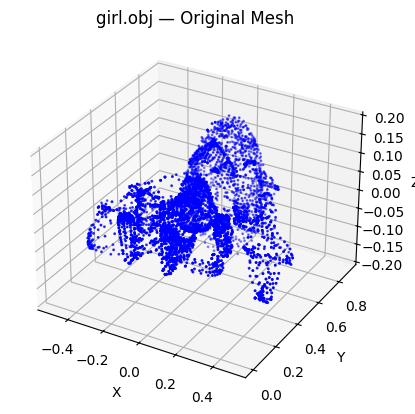

In [ ]:
# ==========================================
# 🧩 Task 1: Load and Inspect Mesh
# ==========================================

# Install dependencies (run once per session)
!pip install numpy trimesh matplotlib

import os
import numpy as np
import trimesh
import matplotlib.pyplot as plt

# --- Path to your mesh folder ---
mesh_folder = "/content/meshes/8samples"

# --- Function to visualize 3D vertices using Matplotlib ---
def show_pointcloud(vertices, title="3D Mesh"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], s=1, c='blue')
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

# --- Inspect each mesh file ---
files = [f for f in os.listdir(mesh_folder) if f.endswith(".obj")]
print(f"📂 Found {len(files)} mesh files: {files}\n")

for file in files:
    mesh_path = os.path.join(mesh_folder, file)
    mesh = trimesh.load(mesh_path, process=False)
    vertices = np.array(mesh.vertices)

    # Compute statistics
    num_vertices = vertices.shape[0]
    v_min = vertices.min(axis=0)
    v_max = vertices.max(axis=0)
    v_mean = vertices.mean(axis=0)
    v_std = vertices.std(axis=0)

    # Print details
    print(f"🔹 Mesh File: {file}")
    print(f"   Number of Vertices: {num_vertices}")
    print(f"   Min (x,y,z): {v_min}")
    print(f"   Max (x,y,z): {v_max}")
    print(f"   Mean (x,y,z): {v_mean}")
    print(f"   Std Dev (x,y,z): {v_std}")
    print("-" * 60)

    # Optional: visualize the mesh (headless-safe)
    show_pointcloud(vertices, title=f"{file} — Original Mesh")


📂 Found 8 mesh files: ['person.obj', 'talwar.obj', 'table.obj', 'explosive.obj', 'cylinder.obj', 'branch.obj', 'fence.obj', 'girl.obj']

✅ Saved Min–Max normalized & quantized versions for person.obj


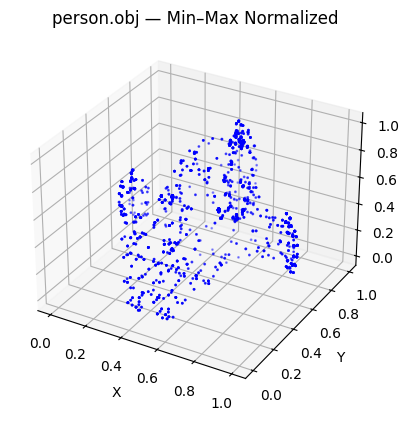

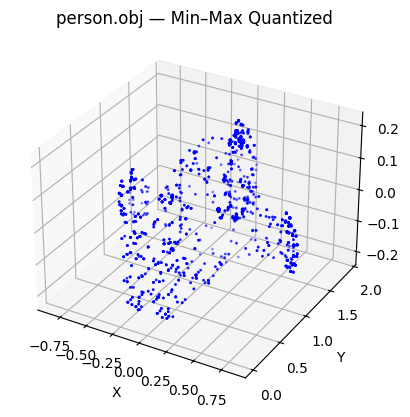

✅ Saved Unit Sphere normalized & quantized versions for person.obj


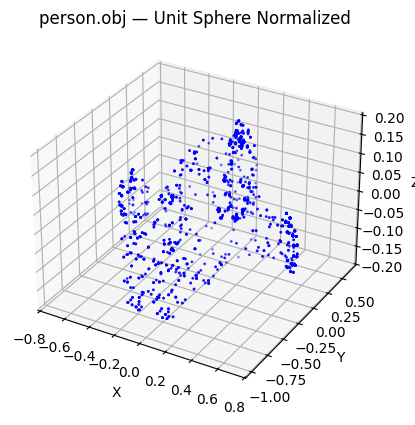

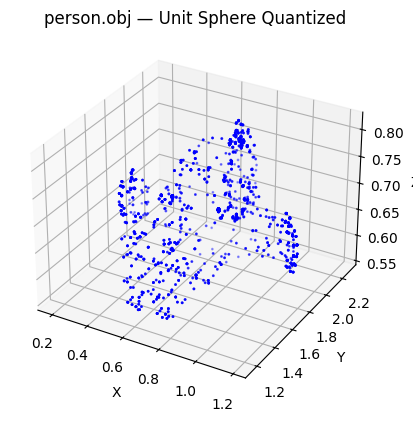

✅ Saved Min–Max normalized & quantized versions for talwar.obj


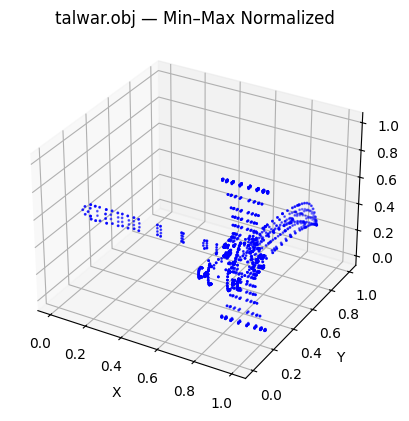

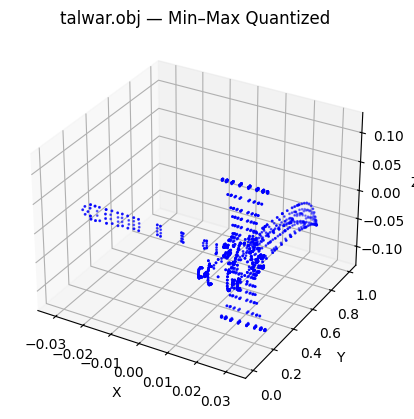

✅ Saved Unit Sphere normalized & quantized versions for talwar.obj


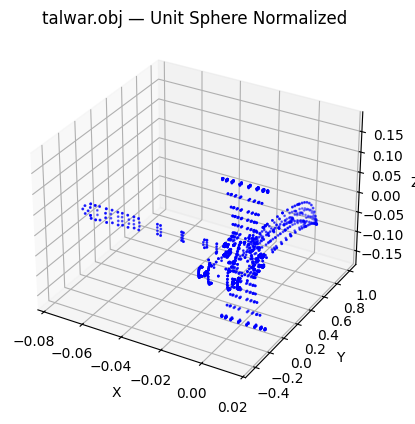

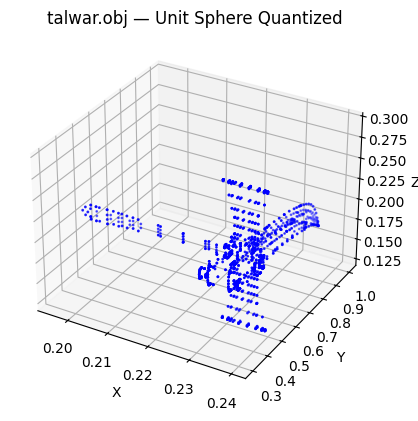

✅ Saved Min–Max normalized & quantized versions for table.obj


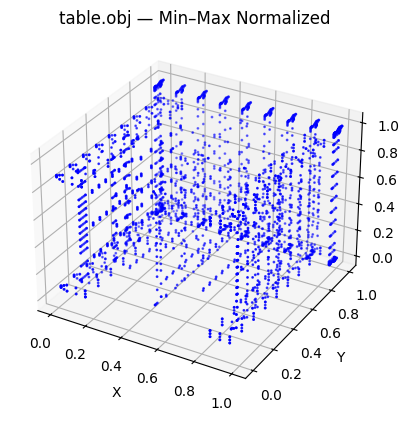

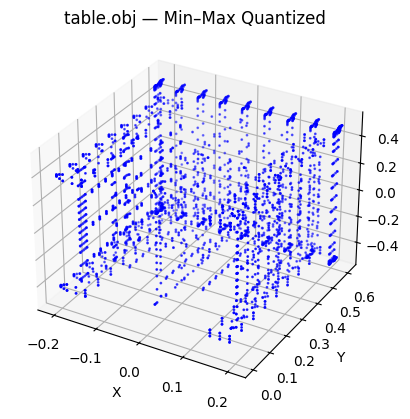

✅ Saved Unit Sphere normalized & quantized versions for table.obj


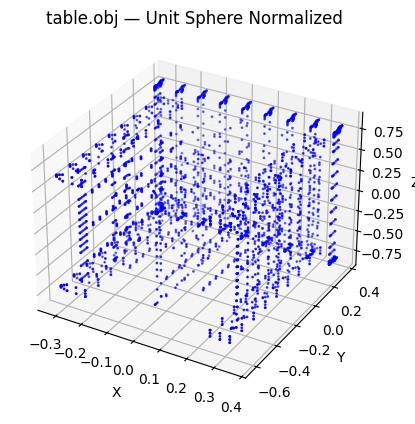

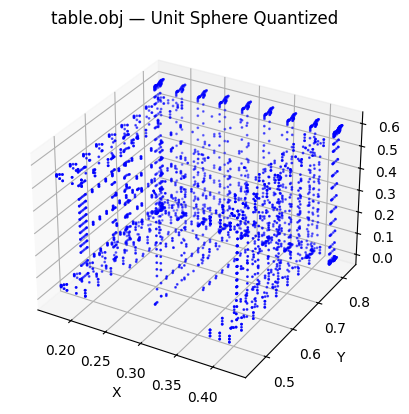

✅ Saved Min–Max normalized & quantized versions for explosive.obj


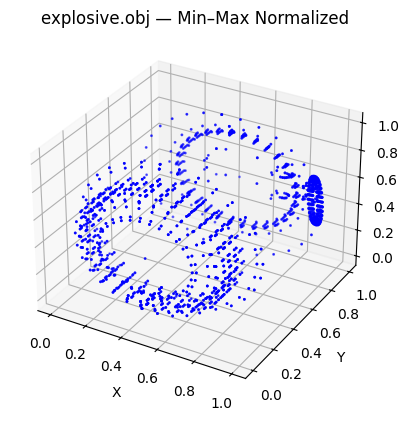

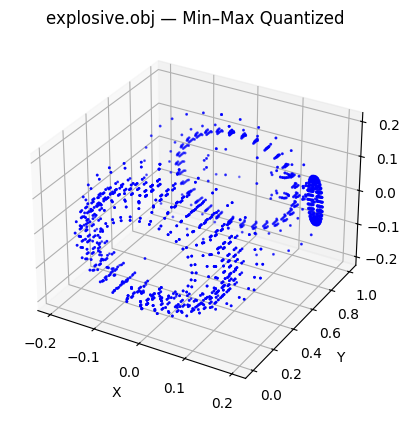

✅ Saved Unit Sphere normalized & quantized versions for explosive.obj


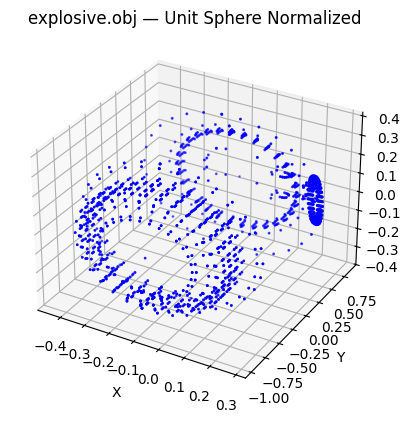

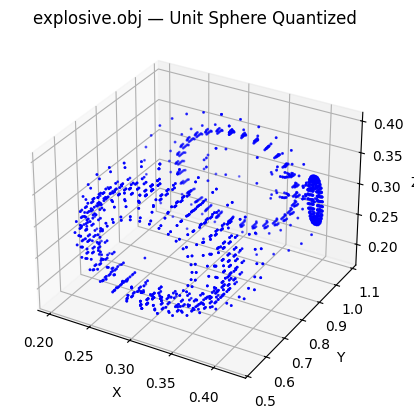

✅ Saved Min–Max normalized & quantized versions for cylinder.obj


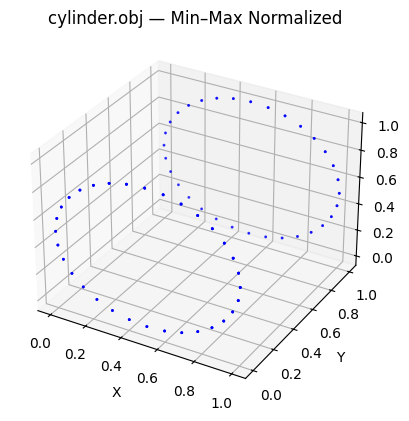

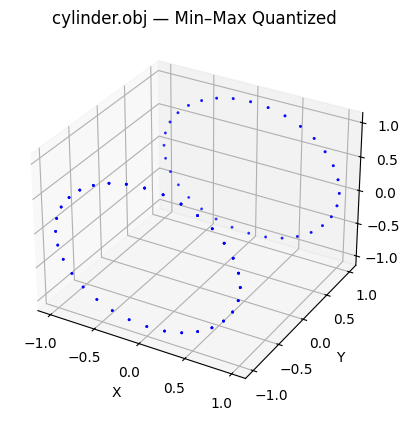

✅ Saved Unit Sphere normalized & quantized versions for cylinder.obj


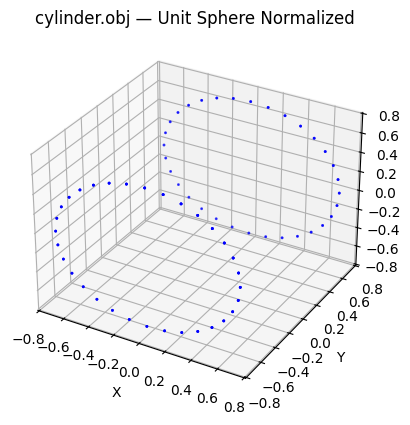

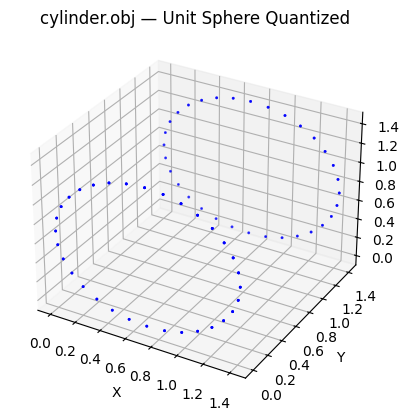

✅ Saved Min–Max normalized & quantized versions for branch.obj


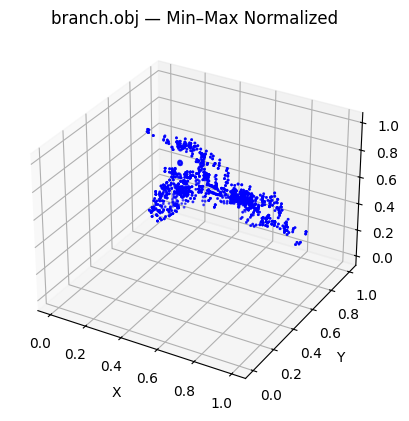

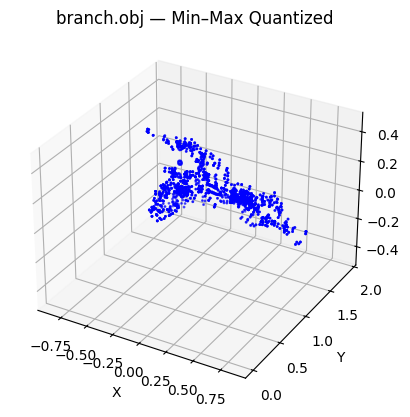

✅ Saved Unit Sphere normalized & quantized versions for branch.obj


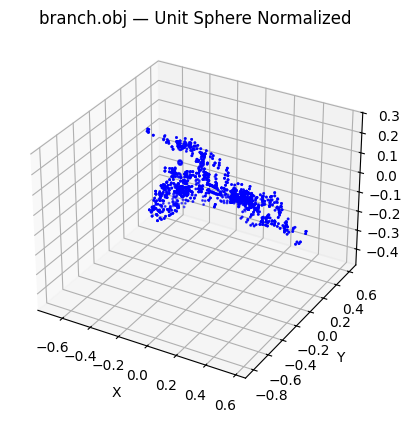

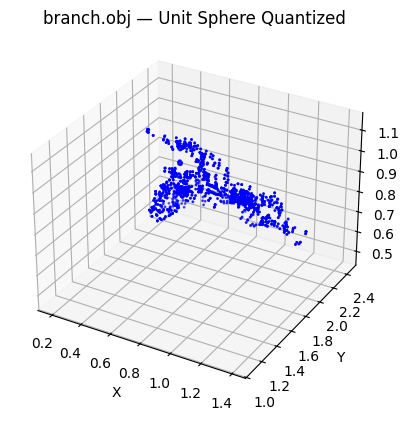

✅ Saved Min–Max normalized & quantized versions for fence.obj


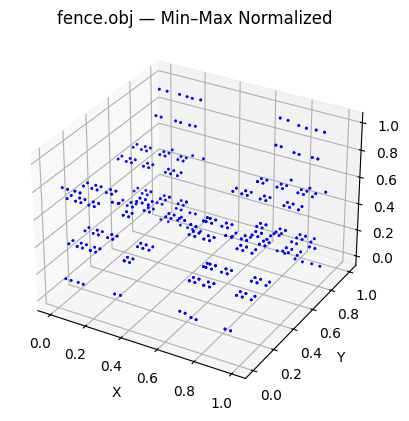

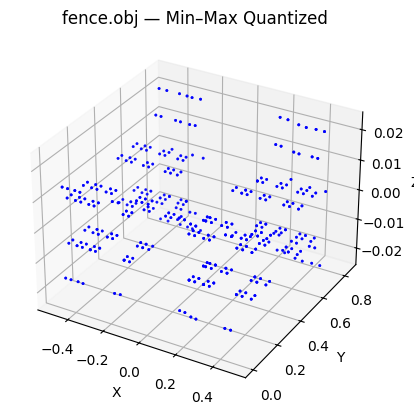

✅ Saved Unit Sphere normalized & quantized versions for fence.obj


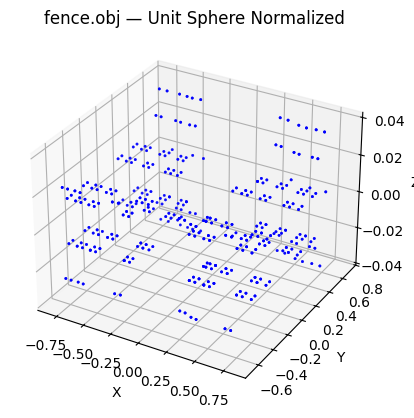

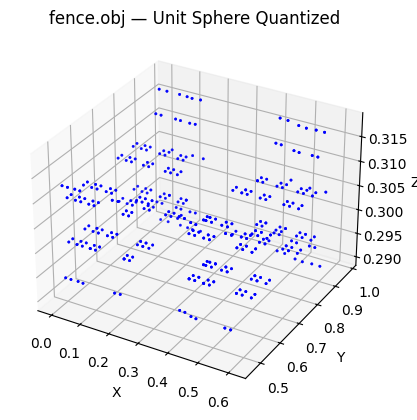

✅ Saved Min–Max normalized & quantized versions for girl.obj


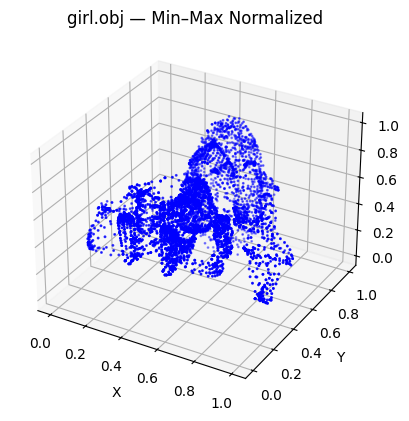

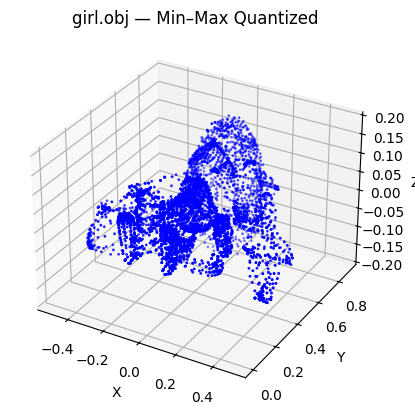

✅ Saved Unit Sphere normalized & quantized versions for girl.obj


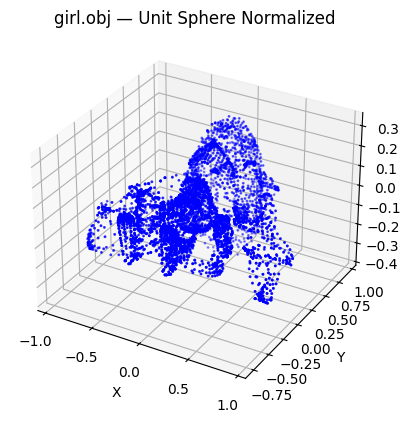

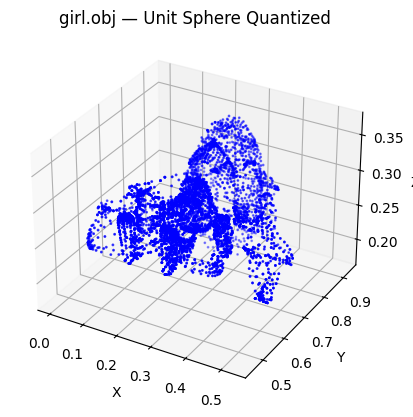


🎯 All normalized and quantized meshes saved in: /content/processed_meshes


In [ ]:
# ==========================================
# 🧩 Task 2: Normalize and Quantize the Mesh (40 Marks)
# ==========================================
!pip install trimesh numpy matplotlib

import os
import numpy as np
import trimesh
import matplotlib.pyplot as plt

# --- Path to your mesh folder ---
mesh_folder = "/content/meshes/8samples"
output_folder = "/content/processed_meshes"
os.makedirs(output_folder, exist_ok=True)

# --- Visualization Helper ---
def show_pointcloud(vertices, title="3D Mesh"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], s=1, c='blue')
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

# --- Normalization Methods ---
def min_max_normalize(vertices):
    v_min = vertices.min(axis=0)
    v_max = vertices.max(axis=0)
    norm = (vertices - v_min) / (v_max - v_min)
    return norm, v_min, v_max

def min_max_denormalize(norm, v_min, v_max):
    return norm * (v_max - v_min) + v_min

def unit_sphere_normalize(vertices):
    center = vertices.mean(axis=0)
    centered = vertices - center
    max_dist = np.linalg.norm(centered, axis=1).max()
    norm = centered / max_dist
    return norm, center, max_dist

def unit_sphere_denormalize(norm, center, max_dist):
    return norm * max_dist + center

# --- Quantization Functions ---
def quantize(vertices_norm, n_bins=1024):
    q = np.floor((vertices_norm - vertices_norm.min()) /
                 (vertices_norm.max() - vertices_norm.min()) * (n_bins - 1)).astype(np.int32)
    return q

def dequantize(q, n_bins=1024):
    return q / (n_bins - 1)

# --- Process Each Mesh ---
files = [f for f in os.listdir(mesh_folder) if f.endswith(".obj")]
print(f"📂 Found {len(files)} mesh files: {files}\n")

for file in files:
    mesh_path = os.path.join(mesh_folder, file)
    mesh = trimesh.load(mesh_path, process=False)
    vertices = np.array(mesh.vertices)
    faces = np.array(mesh.faces)

    # ============ Method 1: Min–Max Normalization ============
    norm_mm, v_min, v_max = min_max_normalize(vertices)
    q_mm = quantize(norm_mm, n_bins=1024)
    deq_mm = dequantize(q_mm, n_bins=1024)
    recon_mm = min_max_denormalize(deq_mm, v_min, v_max)

    # Save normalized and quantized meshes
    mesh_mm_norm = trimesh.Trimesh(vertices=norm_mm, faces=faces)
    mesh_mm_quant = trimesh.Trimesh(vertices=recon_mm, faces=faces)
    mesh_mm_norm.export(os.path.join(output_folder, file.replace(".obj", "_minmax_norm.obj")))
    mesh_mm_quant.export(os.path.join(output_folder, file.replace(".obj", "_minmax_quant.obj")))

    print(f"✅ Saved Min–Max normalized & quantized versions for {file}")

    # Optional visualization
    show_pointcloud(norm_mm, title=f"{file} — Min–Max Normalized")
    show_pointcloud(recon_mm, title=f"{file} — Min–Max Quantized")

    # ============ Method 2: Unit Sphere Normalization ============
    norm_us, center, max_dist = unit_sphere_normalize(vertices)
    q_us = quantize(norm_us, n_bins=1024)
    deq_us = dequantize(q_us, n_bins=1024)
    recon_us = unit_sphere_denormalize(deq_us, center, max_dist)

    # Save normalized and quantized meshes
    mesh_us_norm = trimesh.Trimesh(vertices=norm_us, faces=faces)
    mesh_us_quant = trimesh.Trimesh(vertices=recon_us, faces=faces)
    mesh_us_norm.export(os.path.join(output_folder, file.replace(".obj", "_unitsphere_norm.obj")))
    mesh_us_quant.export(os.path.join(output_folder, file.replace(".obj", "_unitsphere_quant.obj")))

    print(f"✅ Saved Unit Sphere normalized & quantized versions for {file}")

    # Optional visualization
    show_pointcloud(norm_us, title=f"{file} — Unit Sphere Normalized")
    show_pointcloud(recon_us, title=f"{file} — Unit Sphere Quantized")

print("\n🎯 All normalized and quantized meshes saved in:", output_folder)


📂 Found 8 meshes: ['person.obj', 'talwar.obj', 'table.obj', 'explosive.obj', 'cylinder.obj', 'branch.obj', 'fence.obj', 'girl.obj']



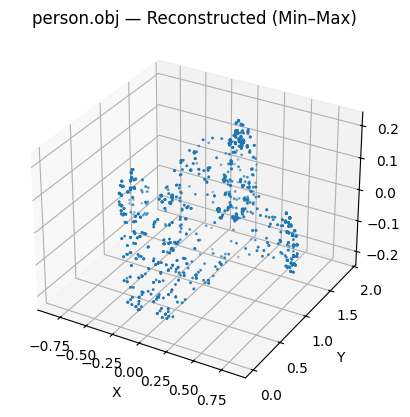

✅ person.obj (Min–Max): MSE=0.00000079, MAE=0.00069171


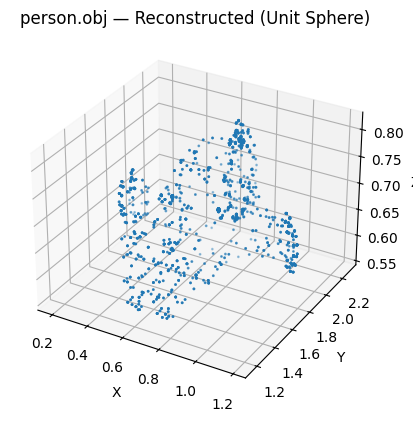

✅ person.obj (Unit Sphere): MSE=0.49784099, MAE=0.68877114
------------------------------------------------------------


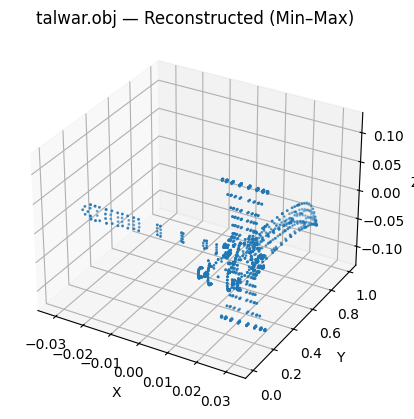

✅ talwar.obj (Min–Max): MSE=0.00000013, MAE=0.00022840


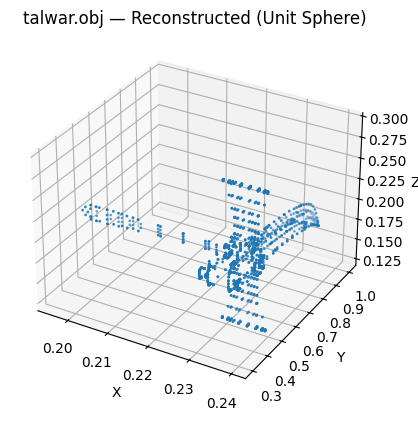

✅ talwar.obj (Unit Sphere): MSE=0.04646601, MAE=0.21147759
------------------------------------------------------------


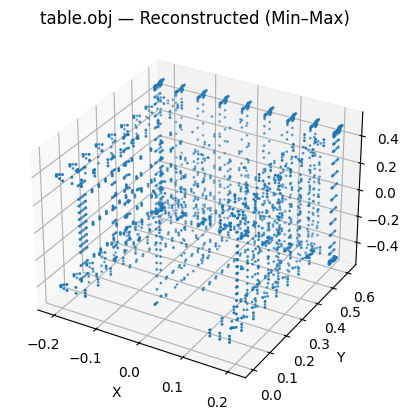

✅ table.obj (Min–Max): MSE=0.00000015, MAE=0.00030674


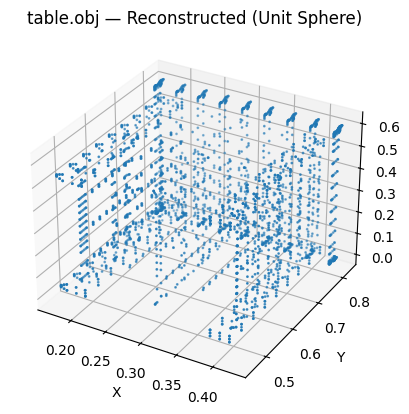

✅ table.obj (Unit Sphere): MSE=0.10079807, MAE=0.30282167
------------------------------------------------------------


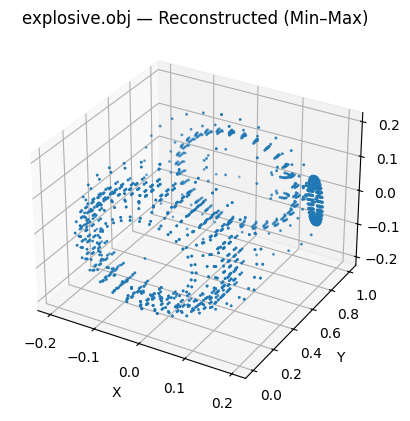

✅ explosive.obj (Min–Max): MSE=0.00000012, MAE=0.00027523


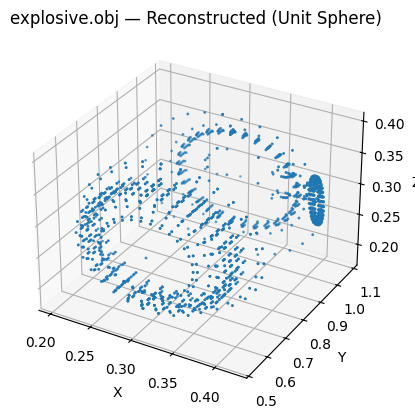

✅ explosive.obj (Unit Sphere): MSE=0.09682436, MAE=0.29170809
------------------------------------------------------------


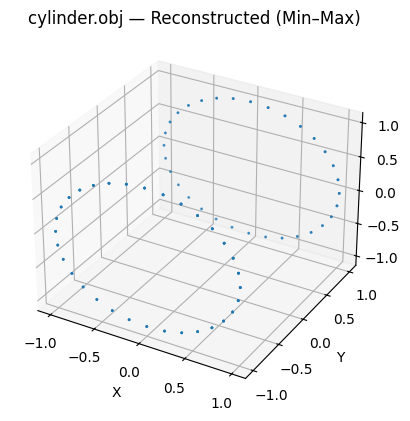

✅ cylinder.obj (Min–Max): MSE=0.00000080, MAE=0.00061095


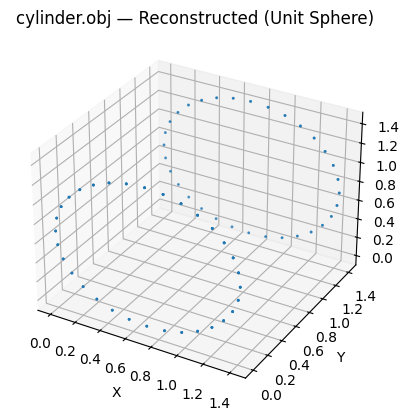

✅ cylinder.obj (Unit Sphere): MSE=0.55653037, MAE=0.70667488
------------------------------------------------------------


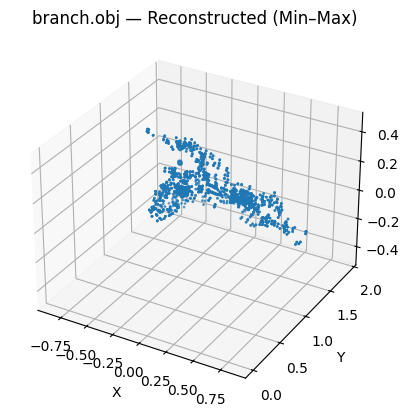

✅ branch.obj (Min–Max): MSE=0.00000078, MAE=0.00073400


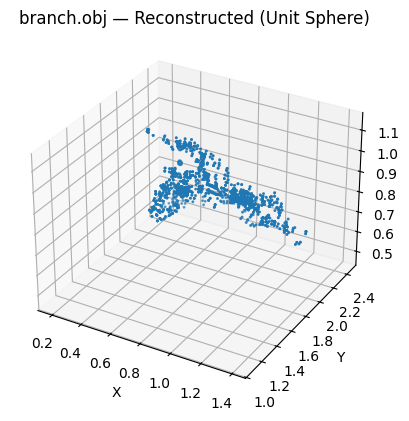

✅ branch.obj (Unit Sphere): MSE=0.60625267, MAE=0.77201864
------------------------------------------------------------


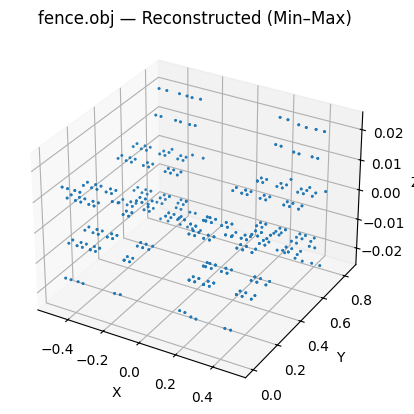

✅ fence.obj (Min–Max): MSE=0.00000016, MAE=0.00027282


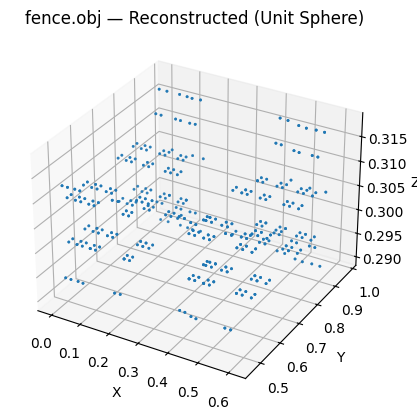

✅ fence.obj (Unit Sphere): MSE=0.10180000, MAE=0.30441427
------------------------------------------------------------


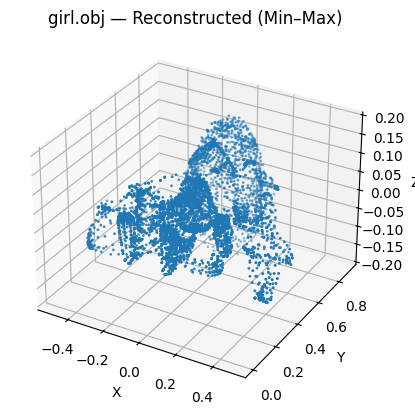

✅ girl.obj (Min–Max): MSE=0.00000021, MAE=0.00036987


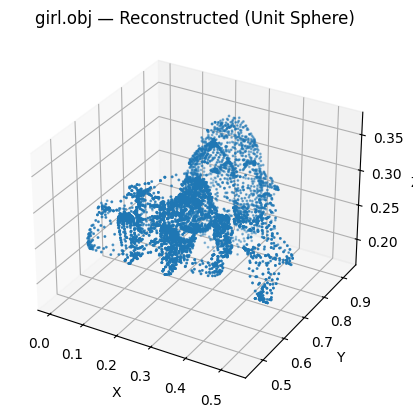

✅ girl.obj (Unit Sphere): MSE=0.07626251, MAE=0.26496405
------------------------------------------------------------


Method           File           MSE       MAE  \
0       Min–Max     person.obj  7.890194e-07  0.000692   
1   Unit Sphere     person.obj  4.978410e-01  0.688771   
2       Min–Max     talwar.obj  1.306784e-07  0.000228   
3   Unit Sphere     talwar.obj  4.646601e-02  0.211478   
4       Min–Max      table.obj  1.488113e-07  0.000307   
5   Unit Sphere      table.obj  1.007981e-01  0.302822   
6       Min–Max  explosive.obj  1.241901e-07  0.000275   
7   Unit Sphere  explosive.obj  9.682436e-02  0.291708   
8       Min–Max   cylinder.obj  7.966258e-07  0.000611   
9   Unit Sphere   cylinder.obj  5.565304e-01  0.706675   
10      Min–Max     branch.obj  7.815263e-07  0.000734   
11  Unit Sphere     branch.obj  6.062527e-01  0.772019   
12      Min–Max      fence.obj  1.568787e-07  0.000273   
13  Unit Sphere      fence.obj  1.018000e-01  0.304414   
14      Min–Max       girl.obj  2.054234e-07  0.000370   
15  Unit Sphere       girl.obj  7.626251e-02  0.264964   

                                              MSE_xyz  \
0   [9.083780687073368e-07, 1.3971271366607855e-06...   
1   [0.5002235307909305, 0.51756748682924, 0.47573...   
2   [1.3872481530843534e-09, 3.7258767946683064e-0...   
3   [0.044729500997029645, 0.04973374322198487, 0....   
4   [4.331020767845622e-08, 1.030992184993578e-07,...   
5   [0.09526112121415929, 0.09727337014117346, 0.1...   
6   [5.2543402568433e-08, 2.720551375193651e-07, 4...   
7   [0.08776135010599911, 0.11580235848510886, 0.0...   
8   [1.1949387631550368e-06, 0.0, 1.19493876315503...   
9   [0.5419022857418058, 0.5857865282624369, 0.541...   
10  [8.983184729166263e-07, 1.173721059976608e-06,...   
11  [0.6058770079300898, 0.6135169539221426, 0.599...   
12  [2.636107364728589e-07, 2.0694012050312048e-07...   
13  [0.11045051697064799, 0.10225570727034648, 0.0...   
14  [3.1480200226874476e-07, 2.594645625615357e-07...   
15  [0.07728978026063837, 0.08044286258956919, 0.0...   

                                              MAE_xyz  
0   [0.0008200550924989865, 0.001040174264297238, ...  
1   [0.6888375219894621, 0.6888016529360603, 0.688...  
2   [3.1514504295319584e-05, 0.0005370669020616219...  
3   [0.2114670047819846, 0.21145356692952905, 0.21...  
4   [0.0001638231939222565, 0.00027134223252734546...  
5   [0.30283601256272086, 0.3028041580006514, 0.30...  
6   [0.00019609583070393622, 0.0004384122255631104...  
7   [0.29170027277100125, 0.2917260047754351, 0.29...  
8   [0.0009164222873900216, 0.0, 0.000916422287390...  
9   [0.7064588820791754, 0.7071068905932808, 0.706...  
10  [0.000818670534695198, 0.0009330417294175057, ...  
11  [0.7720125992344604, 0.7720250029055629, 0.772...  
12  [0.00042580521222883083, 0.0003887926551696250...  
13  [0.3044232690001681, 0.30439297067295207, 0.30...  
14  [0.0004907377713773688, 0.00044145440685659516...  
15  [0.2649654691241756, 0.2649612705568875, 0.264...

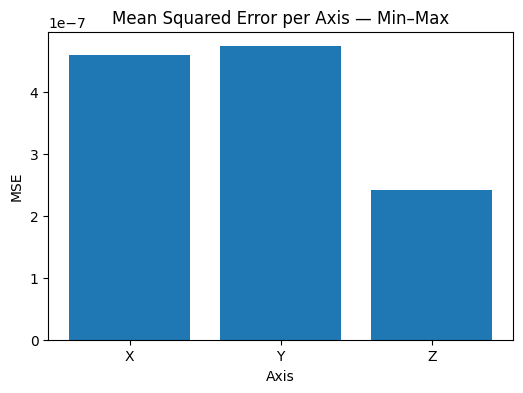

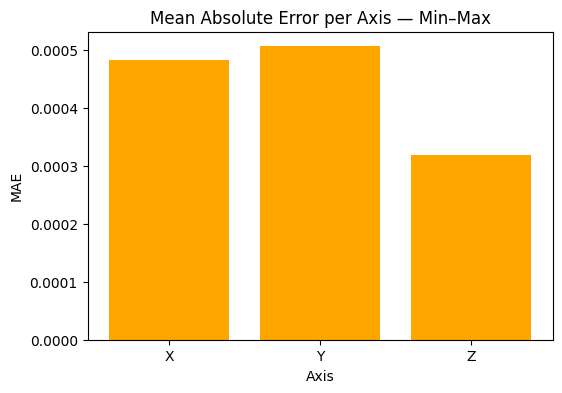

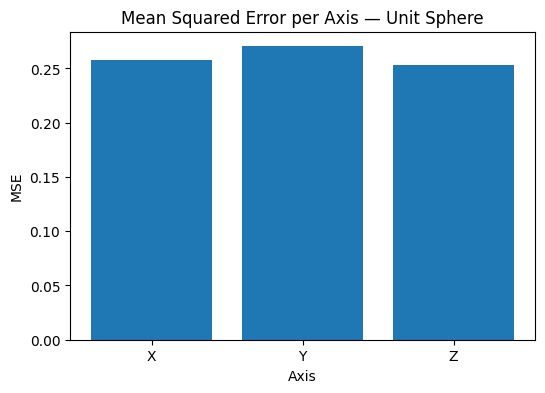

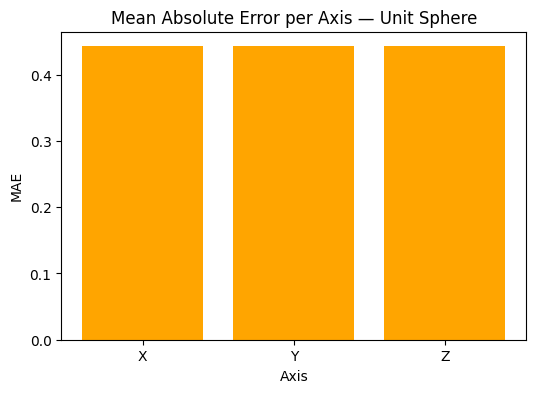

In [ ]:
# ==========================================
# 🧩 Task 3: Dequantize, Denormalize, and Measure Error (40 Marks)
# ==========================================
!pip install trimesh numpy matplotlib

import os
import numpy as np
import trimesh
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- Paths ---
mesh_folder = "/content/meshes/8samples"
output_folder = "/content/processed_meshes"
os.makedirs(output_folder, exist_ok=True)

# --- Helper Functions ---
def min_max_normalize(vertices):
    v_min = vertices.min(axis=0)
    v_max = vertices.max(axis=0)
    norm = (vertices - v_min) / (v_max - v_min)
    return norm, v_min, v_max

def min_max_denormalize(norm, v_min, v_max):
    return norm * (v_max - v_min) + v_min

def unit_sphere_normalize(vertices):
    center = vertices.mean(axis=0)
    centered = vertices - center
    max_dist = np.linalg.norm(centered, axis=1).max()
    norm = centered / max_dist
    return norm, center, max_dist

def unit_sphere_denormalize(norm, center, max_dist):
    return norm * max_dist + center

def quantize(vertices_norm, n_bins=1024):
    q = np.floor((vertices_norm - vertices_norm.min()) /
                 (vertices_norm.max() - vertices_norm.min()) * (n_bins - 1)).astype(np.int32)
    return q

def dequantize(q, n_bins=1024):
    return q / (n_bins - 1)

def compute_errors(original, reconstructed):
    mse_xyz = np.mean((original - reconstructed) ** 2, axis=0)
    mae_xyz = np.mean(np.abs(original - reconstructed), axis=0)
    mse = mean_squared_error(original, reconstructed)
    mae = mean_absolute_error(original, reconstructed)
    return mse, mae, mse_xyz, mae_xyz

def show_pointcloud(vertices, title="Mesh"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], s=1)
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

# --- Process Each Mesh ---
results = []
files = [f for f in os.listdir(mesh_folder) if f.endswith(".obj")]
print(f"📂 Found {len(files)} meshes: {files}\n")

for file in files:
    mesh_path = os.path.join(mesh_folder, file)
    mesh = trimesh.load(mesh_path, process=False)
    vertices = np.array(mesh.vertices)
    faces = np.array(mesh.faces)

    # ---------- Min–Max ----------
    norm_mm, v_min, v_max = min_max_normalize(vertices)
    q_mm = quantize(norm_mm)
    v_deq_mm = dequantize(q_mm)
    recon_mm = min_max_denormalize(v_deq_mm, v_min, v_max)

    mse_mm, mae_mm, mse_xyz_mm, mae_xyz_mm = compute_errors(vertices, recon_mm)
    results.append(["Min–Max", file, mse_mm, mae_mm, mse_xyz_mm, mae_xyz_mm])

    show_pointcloud(recon_mm, title=f"{file} — Reconstructed (Min–Max)")
    print(f"✅ {file} (Min–Max): MSE={mse_mm:.8f}, MAE={mae_mm:.8f}")

    # ---------- Unit Sphere ----------
    norm_us, center, max_dist = unit_sphere_normalize(vertices)
    q_us = quantize(norm_us)
    v_deq_us = dequantize(q_us)
    recon_us = unit_sphere_denormalize(v_deq_us, center, max_dist)

    mse_us, mae_us, mse_xyz_us, mae_xyz_us = compute_errors(vertices, recon_us)
    results.append(["Unit Sphere", file, mse_us, mae_us, mse_xyz_us, mae_xyz_us])

    show_pointcloud(recon_us, title=f"{file} — Reconstructed (Unit Sphere)")
    print(f"✅ {file} (Unit Sphere): MSE={mse_us:.8f}, MAE={mae_us:.8f}")
    print("-" * 60)

# --- Convert results to a table ---
import pandas as pd
df = pd.DataFrame(results, columns=["Method", "File", "MSE", "MAE", "MSE_xyz", "MAE_xyz"])
display(df)

# --- Plot per-axis error comparison ---
for method in ["Min–Max", "Unit Sphere"]:
    subset = df[df["Method"] == method]
    mse_axes = np.mean(np.vstack(subset["MSE_xyz"]), axis=0)
    mae_axes = np.mean(np.vstack(subset["MAE_xyz"]), axis=0)

    plt.figure(figsize=(6,4))
    plt.bar(["X", "Y", "Z"], mse_axes)
    plt.title(f"Mean Squared Error per Axis — {method}")
    plt.xlabel("Axis")
    plt.ylabel("MSE")
    plt.show()

    plt.figure(figsize=(6,4))
    plt.bar(["X", "Y", "Z"], mae_axes, color='orange')
    plt.title(f"Mean Absolute Error per Axis — {method}")
    plt.xlabel("Axis")
    plt.ylabel("MAE")
    plt.show()
